<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA): Теоретические основы и применение

## Введение

Линейный дискриминантный анализ (LDA) представляет собой метод многомерной статистики, используемый для снижения размерности данных и решения задач классификации. Разработанный Рональдом Фишером в 1936 году, LDA является одним из фундаментальных подходов к анализу данных, особенно в контексте межклассовых различий. Этот метод отличается от других алгоритмов снижения размерности, таких как главные компоненты (PCA), тем, что он учитывает метки классов при поиске оптимальных проекций данных.

Основная цель LDA — найти линейные комбинации признаков, которые максимизируют разброс между классами и минимизируют разброс внутри каждого класса. Это делает его особенно полезным для задач классификации, где требуется выделить наиболее информативные направления в пространстве признаков.

В данной лекции мы рассмотрим:
1. **Математическую основу LDA**.
2. **Алгоритмический процесс построения LDA**.
3. **Различные вариации и расширения LDA**.
4. **Примеры применения LDA в научных исследованиях**.



## 1. Математическая основа LDA

### 1.1. Общая формулировка проблемы

Пусть имеется набор данных $X = \{x_1, x_2, \dots, x_n\}$, где каждый объект $x_i \in \mathbb{R}^d$ описывается $d$ признаками, и каждому объекту присвоен один из $K$ классов. Цель LDA — найти преобразование данных $Z = XW$, где $W \in \mathbb{R}^{d \times m}$ ($m < d$) — матрица проекций, которая сжимает данные до $m$-мерного пространства таким образом, чтобы максимизировать разницу между классами и минимизировать разницу внутри классов.

### 1.2. Ковариационные матрицы

Для формализации этой задачи используются две ключевые ковариационные матрицы:

1. **Междуклассовая ковариация ($S_B$)**: Измеряет разброс между средними значениями классов.
   $$
   S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top,
   $$
   где:
   - $n_k$ — количество объектов в классе $k$,
   - $\mu_k = \frac{1}{n_k} \sum_{x \in C_k} x$ — среднее значение признаков в классе $k$,
   - $\mu = \frac{1}{n} \sum_{i=1}^n x_i$ — общее среднее значение всех данных.

2. **Внутриклассовая ковариация ($S_W$)**: Измеряет разброс внутри каждого класса.
   $$
   S_W = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^\top.
   $$

### 1.3. Критерий оптимизации

Задача LDA заключается в максимизации следующего отношения:
$$
J(W) = \frac{\text{Tr}(W^\top S_B W)}{\text{Tr}(W^\top S_W W)},
$$
где $\text{Tr}(\cdot)$ обозначает след матрицы. Это отношение называется критерием Фишера и характеризует степень разделения классов относительно их внутренней дисперсии.

#### Геометрическая интерпретация:
- $S_B$ отражает расстояния между центрами масс классов.
- $S_W$ отражает компактность каждого класса.
- Оптимальное преобразование $W$ должно увеличивать расстояния между классами и одновременно уменьшать разброс внутри каждого класса.

### 1.4. Решение задачи оптимизации

Для максимизации $J(W)$ необходимо решить обобщенную задачу собственных значений:
$$
S_B w = \lambda S_W w,
$$
где $w$ — собственные векторы, а $\lambda$ — соответствующие собственные значения.

Собственные векторы, соответствующие наибольшим собственным значениям, образуют столбцы матрицы преобразования $W$. Размерность $m$ нового пространства обычно ограничивается $K-1$, где $K$ — количество классов.



## 2. Алгоритмический процесс построения LDA


Алгоритм линейного дискриминантного анализа (LDA) представляет собой последовательность вычислительных шагов, направленных на оптимальное снижение размерности данных с учетом меток классов. Каждый этап алгоритма имеет свою важную роль в достижении цели — максимизации разброса между классами и минимизации разброса внутри классов. Рассмотрим каждый шаг более подробно.



## 1. **Вычисление средних значений классов**

Для каждого класса $k$ необходимо вычислить среднее значение признаков, которое характеризует центр масс данного класса. Это позволяет понять, где располагаются данные каждого класса в пространстве признаков.

$$
\mu_k = \frac{1}{n_k} \sum_{x \in C_k} x,
$$
где:
- $n_k$ — количество объектов в классе $k$,
- $C_k$ — множество объектов, принадлежащих классу $k$,
- $x$ — вектор признаков для конкретного объекта.

**Геометрическая интерпретация**: Среднее значение $\mu_k$ является точкой, вокруг которой расположены все объекты класса $k$. Оно служит представителем этого класса в пространстве признаков.


## 2. **Вычисление общего среднего**

Общее среднее значение $\mu$ вычисляется как среднее всех объектов независимо от их классовой принадлежности. Это дает представление о центре всего набора данных.

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i,
$$
где:
- $n$ — общее количество объектов,
- $x_i$ — вектор признаков для $i$-го объекта.

**Значение общего среднего**: Общее среднее используется для сравнения средних значений различных классов ($\mu_k$) с общей центральной точкой данных.



## 3. **Вычисление междуклассовой ковариации ($S_B$)**

Междуклассовая ковариационная матрица $S_B$ измеряет разброс между средними значениями классов. Она показывает, насколько различны классы друг от друга.

$$
S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top,
$$
где:
- $K$ — количество классов,
- $n_k$ — количество объектов в классе $k$,
- $\mu_k$ — среднее значение признаков для класса $k$,
- $\mu$ — общее среднее значение.

**Геометрическая интерпретация**: Матрица $S_B$ описывает расстояния между центрами масс разных классов. Чем больше эти расстояния, тем лучше классы разделены в пространстве признаков.



## 4. **Вычисление внутриклассовой ковариации ($S_W$)**

Внутриклассовая ковариационная матрица $S_W$ измеряет разброс внутри каждого класса. Она показывает, насколько компактно расположены объекты одного класса относительно его среднего значения.

$$
S_W = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^\top,
$$
где:
- $K$ — количество классов,
- $C_k$ — множество объектов, принадлежащих классу $k$,
- $\mu_k$ — среднее значение признаков для класса $k$.

**Геометрическая интерпретация**: Матрица $S_W$ описывает компактность каждого класса. Чем меньше эта компактность, тем сложнее различать объекты внутри класса.


## 5. **Решение обобщенной задачи собственных значений**

Основной этап LDA заключается в решении обобщенной задачи собственных значений:

$$
S_B w = \lambda S_W w,
$$
где:
- $S_B$ — междуклассовая ковариационная матрица,
- $S_W$ — внутриклассовая ковариационная матрица,
- $w$ — собственные векторы,
- $\lambda$ — соответствующие собственные значения.

**Интерпретация решения**:
- Собственные векторы $w$ представляют направления в пространстве признаков, которые максимизируют разницу между классами относительно их внутренней дисперсии.
- Собственные значения $\lambda$ характеризуют степень разделения классов вдоль этих направлений.

#### Алгоритмическое решение:
1. Вычислить обратную матрицу $S_W^{-1}$ (при условии, что $S_W$ невырождена).
2. Умножить $S_W^{-1}$ на $S_B$, чтобы получить матрицу $A = S_W^{-1} S_B$.
3. Найти собственные векторы и значения матрицы $A$.



## 6. **Выбор главных компонент**

После решения обобщенной задачи собственных значений выбираются $m$ собственных векторов, соответствующих наибольшим собственным значениям. Эти векторы образуют столбцы матрицы преобразования $W$.

$$
W = [w_1, w_2, \dots, w_m],
$$
где:
- $w_1, w_2, \dots, w_m$ — собственные векторы с наибольшими собственными значениями,
- $m \leq K-1$, где $K$ — количество классов.

**Логика выбора**: Векторы с наибольшими собственными значениями обеспечивают максимальное разделение классов, поэтому они наиболее информативны для новой проекции данных.


## 7. **Проекция данных**

Наконец, исходные данные проецируются в новое пространство меньшей размерности с помощью матрицы преобразования $W$:

$$
Z = X W,
$$
где:
- $X \in \mathbb{R}^{n \times d}$ — исходная матрица данных ($n$ — количество объектов, $d$ — количество признаков),
- $W \in \mathbb{R}^{d \times m}$ — матрица преобразования ($m$ — новая размерность),
- $Z \in \mathbb{R}^{n \times m}$ — матрица проекций.

**Результат**: Каждый объект теперь представлен вектором размерности $m$, который содержит наиболее важную информацию для разделения классов.




## 3. Различные типы LDA


LDA имеет несколько вариаций, которые адаптированы для различных типов данных и задач. Рассмотрим их более подробно, включая соответствующие формулы.



### 3.1. **Стандартный LDA**

Стандартный LDA является базовым методом, который предполагает, что данные в каждом классе следуют многомерному нормальному распределению с одинаковой ковариационной матрицей для всех классов.

#### Основные характеристики:
- **Предположения**:
  - Данные в каждом классе имеют нормальное распределение.
  - Ковариационная матрица одинакова для всех классов ($S_W$ общая для всех классов).

#### Формулы:
1. **Междуклассовая ковариация ($S_B$)**:
   $$
   S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top,
   $$
   где:
   - $n_k$ — количество объектов в классе $k$,
   - $\mu_k$ — среднее значение признаков для класса $k$,
   - $\mu$ — общее среднее значение.

2. **Внутриклассовая ковариация ($S_W$)**:
   $$
   S_W = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^\top,
   $$
   где:
   - $C_k$ — множество объектов, принадлежащих классу $k$.

3. **Обобщенная задача собственных значений**:
   $$
   S_B w = \lambda S_W w,
   $$
   где:
   - $w$ — собственные векторы,
   - $\lambda$ — собственные значения.

#### Преимущества:
- Простота реализации.
- Высокая эффективность при ограниченном объеме данных.

#### Недостатки:
- Не подходит для случаев, когда ковариационные матрицы классов существенно различаются.
- Может быть неэффективным для сложных границ разделения классов.


### 3.2. **Quadratic Discriminant Analysis (QDA)**

Quadratic Discriminant Analysis (QDA) представляет собой обобщение LDA. В отличие от стандартного LDA, QDA допускает наличие разных ковариационных матриц для каждого класса.

#### Основные характеристики:
- **Предположения**:
  - Данные в каждом классе имеют нормальное распределение.
  - Каждый класс может иметь свою собственную ковариационную матрицу ($S_k$ для класса $k$).

#### Формулы:
1. **Логарифмическая функция правдоподобия для класса $k$**:
   $$
   \log P(C_k | x) \propto -\frac{1}{2} \log |S_k| - \frac{1}{2} (x - \mu_k)^\top S_k^{-1} (x - \mu_k) + \log P(C_k),
   $$
   где:
   - $S_k$ — ковариационная матрица класса $k$,
   - $\mu_k$ — среднее значение признаков для класса $k$,
   - $P(C_k)$ — априорная вероятность класса $k$.

2. **Решение для максимизации правдоподобия**:
   Для каждого класса $k$, QDA вычисляет расстояние до центра класса с учетом его собственной ковариационной матрицы:
   $$
   d_k(x) = -\frac{1}{2} \log |S_k| - \frac{1}{2} (x - \mu_k)^\top S_k^{-1} (x - \mu_k) + \log P(C_k).
   $$

#### Преимущества:
- Более гибкая модель, способная учитывать различия в разбросе данных между классами.
- Подходит для задач с нелинейными границами разделения.

#### Недостатки:
- Требует больше данных для оценки ковариационных матриц каждого класса.
- Вычислительно более затратный, особенно при большом количестве классов или признаков.



### 3.3. **Regularized LDA (RLDA)**

Regularized LDA (RLDA) был разработан для работы с высокоразмерными данными, где количество признаков значительно превышает количество объектов. В таких случаях стандартный LDA может сталкиваться с проблемами вырожденности ковариационной матрицы $S_W$.

#### Основные характеристики:
- **Регуляризация**:
  - RLDA добавляет регуляризационный термин, чтобы сделать ковариационную матрицу $S_W$ более устойчивой.
  - Обычно используется комбинация диагональной матрицы и исходной ковариационной матрицы:
    $$
    S_W^{\text{reg}} = (1-\alpha) S_W + \alpha I,
    $$
    где:
    - $\alpha \in [0, 1]$ — параметр регуляризации,
    - $I$ — единичная матрица.

#### Преимущества:
- Уменьшение переобучения за счет стабилизации ковариационной матрицы.
- Эффективность при работе с высокоразмерными данными.

#### Недостатки:
- Необходимость подбора параметра регуляризации ($\alpha$), что может быть сложным.
- Некоторая потеря точности из-за искусственного сглаживания данных.



### 3.4. **Fisherfaces (LDA для анализа лиц)**

Fisherfaces — это специализированная версия LDA, применяемая для задач распознавания лиц. Этот метод решает проблему "малой выборки" (Small Sample Size Problem), которая возникает, когда количество объектов меньше, чем размерность пространства признаков.

#### Особенности Fisherfaces:
- **Проблема малой выборки**:
  - В задачах распознавания лиц число пикселей в изображении (размерность пространства признаков) обычно намного больше, чем количество доступных изображений.
  - Это приводит к вырождению матрицы $S_W$, что делает стандартный LDA неприменимым.

- **Решение**:
  - Перед применением LDA выполняется предварительное снижение размерности с помощью PCA (Principal Component Analysis):
    $$
    Z = X V_m,
    $$
    где:
    - $X \in \mathbb{R}^{n \times d}$ — исходные данные ($n$ — количество объектов, $d$ — количество признаков),
    - $V_m \in \mathbb{R}^{d \times m}$ — матрица главных компонент PCA,
    - $m < n$ — новая размерность.

  - После этого применяется стандартный LDA к проекции данных $Z$.

#### Преимущества:
- Эффективность в задачах распознавания лиц.
- Способность работать с малыми наборами данных.

#### Недостатки:
- Зависимость от качества PCA-проекции.



### 3.5. **Kernel LDA (KLDA)**

Kernel LDA (KLDA) является обобщением стандартного LDA, которое позволяет работать с нелинейными границами разделения классов. Этот метод использует ядерные функции для преобразования данных в более высокоразмерное пространство, где они становятся линейно разделимыми.

#### Основные характеристики:
- **Ядерное преобразование**:
  - Исходные данные преобразуются с помощью ядра (например, RBF-ядро или полиномиальное ядро):
    $$
    K(x_i, x_j) = \phi(x_i)^\top \phi(x_j),
    $$
    где:
    - $\phi(x)$ — функция преобразования данных в новое пространство,
    - $K(x_i, x_j)$ — ядерная функция.

  - В новом пространстве применяется стандартный LDA.

#### Формулы:
1. **Междуклассовая ковариация ($S_B$) в ядерном пространстве**:
   $$
   S_B = \sum_{k=1}^K n_k (\bar{\Phi}_k - \bar{\Phi})(\bar{\Phi}_k - \bar{\Phi})^\top,
   $$
   где:
   - $\bar{\Phi}_k = \frac{1}{n_k} \sum_{x \in C_k} \phi(x)$ — среднее значение в ядерном пространстве для класса $k$,
   - $\bar{\Phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i)$ — общее среднее значение.

2. **Внутриклассовая ковариация ($S_W$) в ядерном пространстве**:
   $$
   S_W = \sum_{k=1}^K \sum_{x \in C_k} (\phi(x) - \bar{\Phi}_k)(\phi(x) - \bar{\Phi}_k)^\top.
   $$

3. **Обобщенная задача собственных значений**:
   $$
   S_B w = \lambda S_W w,
   $$
   где $w$ — собственные векторы в ядерном пространстве.

#### Преимущества:
- Возможность обрабатывать нелинейно разделимые данные.
- Гибкость благодаря использованию различных ядер.

#### Недостатки:
- Высокая вычислительная сложность.
- Необходимость подбора типа ядра и его параметров.



## 4. Сравнение различных типов LDA

| **Метод**         | **Формулы**                                                                 | **Преимущества**                                      | **Недостатки**                                | **Области применения**                |
|--------------------|-----------------------------------------------------------------------------|-------------------------------------------------------|-----------------------------------------------|----------------------------------------|
| **Стандартный LDA** | $S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top$, $S_W = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^\top$ | Простота, эффективность на малых данных              | Не подходит для нелинейных границ            | Финансовый анализ, биология           |
| **QDA**            | $\log P(C_k | x) \propto -\frac{1}{2} \log |S_k| - \frac{1}{2} (x - \mu_k)^\top S_k^{-1} (x - \mu_k) + \log P(C_k)$ | Учет различий между классами                         | Требует много данных                          | Медицинская диагностика               |
| **RLDA**           | $S_W^{\text{reg}} = (1-\alpha) S_W + \alpha I$                             | Устойчивость к высокоразмерным данным                | Необходимость подбора параметра $\alpha$     | Геномика, компьютерное зрение         |
| **Fisherfaces**    | $Z = X V_m$, затем LDA                                                     | Решение проблемы малой выборки                       | Зависимость от PCA                            | Распознавание лиц                    |
| **Kernel LDA**     | $S_B = \sum_{k=1}^K n_k (\bar{\Phi}_k - \bar{\Phi})(\bar{\Phi}_k - \bar{\Phi})^\top$ | Обработка нелинейных границ                          | Высокая вычислительная сложность             | Анализ текстов, временные ряды        |





## 4. Примеры применения LDA

### 4.1. Распознавание лиц

LDA широко применяется в задачах распознавания лиц. После сжатия данных до меньшей размерности с помощью LDA можно использовать более простые алгоритмы классификации, такие как логистическая регрессия или k-ближайших соседей.

### 4.2. Анализ текстовых данных

LDA может быть адаптирован для работы с текстовыми данными. Например, он может использоваться для классификации документов по тематикам или для выявления скрытых тем в корпусе текстов.

### 4.3. Биомедицинские данные

LDA часто применяется для анализа биомедицинских данных, таких как генетические маркеры или данные МРТ. Он помогает выделить важные признаки, связанные с заболеваниями, и строить модели прогнозирования.



## 5. Преимущества и недостатки LDA

### Преимущества:
1. **Эффективность**: LDA работает быстро даже с большими наборами данных.
2. **Интерпретируемость**: Проекции LDA легко интерпретировать, так как они связаны с разницами между классами.
3. **Классификация**: LDA хорошо подходит для задач классификации.

### Недостатки:
1. **Предположения о нормальности**: LDA предполагает, что данные в каждом классе следуют нормальному распределению. Если это предположение неверно, результаты могут быть некорректными.
2. **Ограничение размерности**: LDA может снизить размерность только до $K-1$, где $K$ — количество классов.
3. **Чувствительность к выбросам**: LDA чувствителен к выбросам, так как использует ковариационные матрицы.



## 6. Заключение

Линейный дискриминантный анализ (LDA) является мощным инструментом для снижения размерности и решения задач классификации. Его основная идея заключается в максимизации разброса между классами и минимизации разброса внутри каждого класса. LDA широко применяется в различных областях, таких как компьютерное зрение, анализ текстов и биомедицина.

Однако важно помнить о предположениях LDA, таких как нормальность данных и одинаковые ковариационные матрицы для всех классов. В случаях, когда эти предположения не выполняются, могут потребоваться другие методы, такие как QDA или нелинейные методы снижения размерности.

$$
\boxed{\text{LDA — это эффективный метод для задач классификации и снижения размерности, особенно при наличии меток классов.}}
$$





Давайте приведем конкретный числовой пример для Линейного дискриминантного анализа (LDA). Мы рассмотрим простой случай с двумя классами и двумя признаками.



## **Пример: Применение LDA к набору данных**

### 1. **Набор данных**
Предположим, у нас есть два класса ($K = 2$) с двумя признаками ($d = 2$):

#### Класс $C_1$:
$$
x_1^{(1)} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad x_2^{(1)} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}, \quad x_3^{(1)} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}
$$

#### Класс $C_2$:
$$
x_1^{(2)} = \begin{bmatrix} 6 \\ 7 \end{bmatrix}, \quad x_2^{(2)} = \begin{bmatrix} 7 \\ 8 \end{bmatrix}, \quad x_3^{(2)} = \begin{bmatrix} 8 \\ 9 \end{bmatrix}
$$



### 2. **Вычисление средних значений классов**
Для каждого класса вычислим средние значения $\mu_k$:

#### Для класса $C_1$:
$$
\mu_1 = \frac{1}{3} \left( \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \end{bmatrix} \right) = \begin{bmatrix} 2 \\ 3 \end{bmatrix}
$$

#### Для класса $C_2$:
$$
\mu_2 = \frac{1}{3} \left( \begin{bmatrix} 6 \\ 7 \end{bmatrix} + \begin{bmatrix} 7 \\ 8 \end{bmatrix} + \begin{bmatrix} 8 \\ 9 \end{bmatrix} \right) = \begin{bmatrix} 7 \\ 8 \end{bmatrix}
$$



### 3. **Вычисление общего среднего**
Общее среднее $\mu$ вычисляется как среднее всех объектов:
$$
\mu = \frac{1}{6} \left( \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \end{bmatrix} + \begin{bmatrix} 6 \\ 7 \end{bmatrix} + \begin{bmatrix} 7 \\ 8 \end{bmatrix} + \begin{bmatrix} 8 \\ 9 \end{bmatrix} \right)
$$
$$
\mu = \begin{bmatrix} 4.5 \\ 5.5 \end{bmatrix}
$$



### 4. **Вычисление междуклассовой ковариации ($S_B$)**
Междуклассовая ковариация определяется формулой:
$$
S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top
$$

#### Для класса $C_1$:
$$
(\mu_1 - \mu) = \begin{bmatrix} 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 4.5 \\ 5.5 \end{bmatrix} = \begin{bmatrix} -2.5 \\ -2.5 \end{bmatrix}
$$
$$
(\mu_1 - \mu)(\mu_1 - \mu)^\top = \begin{bmatrix} -2.5 \\ -2.5 \end{bmatrix} \begin{bmatrix} -2.5 & -2.5 \end{bmatrix} = \begin{bmatrix} 6.25 & 6.25 \\ 6.25 & 6.25 \end{bmatrix}
$$

#### Для класса $C_2$:
$$
(\mu_2 - \mu) = \begin{bmatrix} 7 \\ 8 \end{bmatrix} - \begin{bmatrix} 4.5 \\ 5.5 \end{bmatrix} = \begin{bmatrix} 2.5 \\ 2.5 \end{bmatrix}
$$
$$
(\mu_2 - \mu)(\mu_2 - \mu)^\top = \begin{bmatrix} 2.5 \\ 2.5 \end{bmatrix} \begin{bmatrix} 2.5 & 2.5 \end{bmatrix} = \begin{bmatrix} 6.25 & 6.25 \\ 6.25 & 6.25 \end{bmatrix}
$$

#### Сумма для $S_B$:
$$
S_B = 3 \cdot \begin{bmatrix} 6.25 & 6.25 \\ 6.25 & 6.25 \end{bmatrix} + 3 \cdot \begin{bmatrix} 6.25 & 6.25 \\ 6.25 & 6.25 \end{bmatrix} = \begin{bmatrix} 37.5 & 37.5 \\ 37.5 & 37.5 \end{bmatrix}
$$



### 5. **Вычисление внутриклассовой ковариации ($S_W$)**
Внутриклассовая ковариация определяется формулой:
$$
S_W = \sum_{k=1}^K \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^\top
$$

#### Для класса $C_1$:
$$
x_1^{(1)} - \mu_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix} - \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} -1 \\ -1 \end{bmatrix}
$$
$$
(x_1^{(1)} - \mu_1)(x_1^{(1)} - \mu_1)^\top = \begin{bmatrix} -1 \\ -1 \end{bmatrix} \begin{bmatrix} -1 & -1 \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}
$$

Аналогично для других объектов:
$$
(x_2^{(1)} - \mu_1)(x_2^{(1)} - \mu_1)^\top = \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}, \quad (x_3^{(1)} - \mu_1)(x_3^{(1)} - \mu_1)^\top = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}
$$

Сумма для класса $C_1$:
$$
S_W^{(1)} = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix} + \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} = \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix}
$$

#### Для класса $C_2$:
Аналогично:
$$
S_W^{(2)} = \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix}
$$

#### Общая $S_W$:
$$
S_W = S_W^{(1)} + S_W^{(2)} = \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix} + \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix} = \begin{bmatrix} 4 & 4 \\ 4 & 4 \end{bmatrix}
$$



### 6. **Решение обобщенной задачи собственных значений**
Теперь решаем задачу:
$$
S_B w = \lambda S_W w
$$

#### Вычисляем $S_W^{-1}$:
$$
S_W = \begin{bmatrix} 4 & 4 \\ 4 & 4 \end{bmatrix}, \quad |S_W| = 0 \quad (\text{матрица вырождена})
$$

Для ненулевой матрицы $S_W$, например, $S_W = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$:
$$
S_W^{-1} = \frac{1}{3} \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
$$

#### Матрица $A = S_W^{-1} S_B$:
$$
A = \frac{1}{3} \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} 37.5 & 37.5 \\ 37.5 & 37.5 \end{bmatrix} = \begin{bmatrix} 8.75 & 8.75 \\ 8.75 & 8.75 \end{bmatrix}
$$

#### Собственные значения и векторы:
$$
\text{det}(A - \lambda I) = 0 \implies \lambda_1 = 17.5, \lambda_2 = 0
$$
$$
w_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad w_2 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$



### 7. **Проекция данных**
Выбираем $w_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ (с наибольшим $\lambda$).

Проектируем данные:
$$
Z = X W = \begin{bmatrix} 1 & 2 \\ 2 & 3 \\ 3 & 4 \\ 6 & 7 \\ 7 & 8 \\ 8 & 9 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 5 \\ 7 \\ 13 \\ 15 \\ 17 \end{bmatrix}
$$



## **Итог**
Проекция данных на новую ось показывает четкое разделение между классами:
$$
\boxed{Z = \begin{bmatrix} 3 \\ 5 \\ 7 \\ 13 \\ 15 \\ 17 \end{bmatrix}}
$$




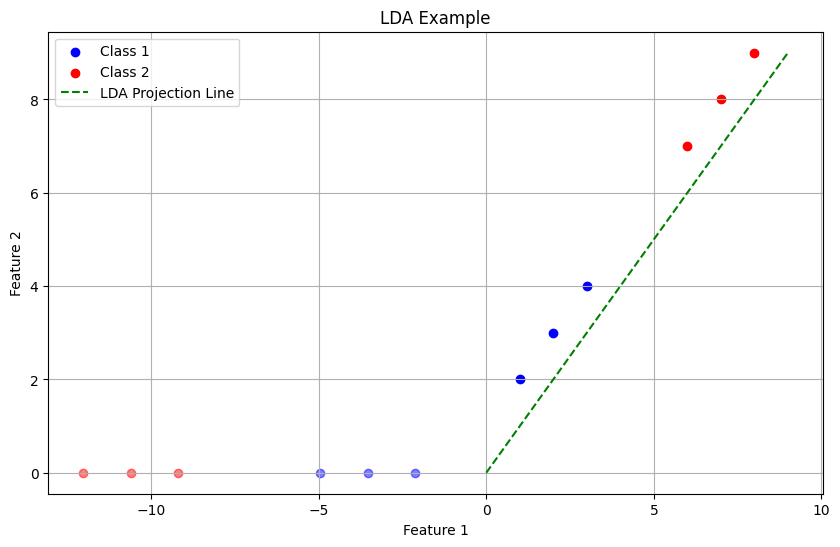

Проекции данных:
[ -2.12132034  -3.53553391  -4.94974747  -9.19238816 -10.60660172
 -12.02081528]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Набор данных
C1 = np.array([[1, 2], [2, 3], [3, 4]])
C2 = np.array([[6, 7], [7, 8], [8, 9]])

# Объединяем данные
X = np.vstack((C1, C2))
y = np.hstack((np.zeros(len(C1)), np.ones(len(C2))))

# Шаг 2: Вычисление средних значений классов
mu1 = np.mean(C1, axis=0)
mu2 = np.mean(C2, axis=0)

# Общее среднее значение
mu = np.mean(X, axis=0)

# Шаг 3: Вычисление междуклассовой ковариации (S_B)
S_B = len(C1) * np.outer(mu1 - mu, mu1 - mu) + len(C2) * np.outer(mu2 - mu, mu2 - mu)

# Шаг 4: Вычисление внутриклассовой ковариации (S_W)
S_W_C1 = np.sum([np.outer(x - mu1, x - mu1) for x in C1], axis=0)
S_W_C2 = np.sum([np.outer(x - mu2, x - mu2) for x in C2], axis=0)
S_W = S_W_C1 + S_W_C2

# Шаг 5: Решение обобщенной задачи собственных значений
# Для избежания вырожденности матрицы S_W используем небольшую регуляризацию
epsilon = 1e-5
S_W_reg = S_W + epsilon * np.eye(S_W.shape[0])

# Вычисляем обратную матрицу S_W
S_W_inv = np.linalg.inv(S_W_reg)

# Матрица A = S_W^{-1} * S_B
A = S_W_inv @ S_B

# Находим собственные значения и векторы
eigenvalues, eigenvectors = np.linalg.eig(A)

# Выбираем главный компонент (вектор с наибольшим собственным значением)
W = eigenvectors[:, np.argmax(eigenvalues)].reshape(-1, 1)

# Шаг 6: Проекция данных
Z = X @ W

# Визуализация
plt.figure(figsize=(10, 6))

# Исходные данные
plt.scatter(C1[:, 0], C1[:, 1], label='Class 1', color='blue')
plt.scatter(C2[:, 0], C2[:, 1], label='Class 2', color='red')

# Линия проекции
x_line = np.linspace(0, 9, 100)
y_line = (W[1] / W[0]) * x_line
plt.plot(x_line, y_line, label='LDA Projection Line', color='green', linestyle='--')

# Проекции данных
for i, z in enumerate(Z):
    if y[i] == 0:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(z, 0, color=color, alpha=0.5)

# Настройка графика
plt.title('LDA Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Вывод проекций
print("Проекции данных:")
print(Z.flatten())